<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Классификация звуков</b></h3>

**Автор**: Ермекова Асель


В этом задании вам предстоит решить задачу классификации звуков на основе wav файлов и использовании различных аугментаций данных.

Есть две части этого домашнего задания.

### 1 Часть. Отправить ваши предсказания в Stepik.
Результат вашей лучшей модели будет оцениваться на тестовой выборке по метрике Accuracy. Эта часть оценивается до 5 баллов.

1) $1.00 \geqslant score \geqslant 0.75$ --- 5 баллов

2) $0.75 > score \geqslant 0.70$ --- 4 балла

3) $0.70 > score \geqslant 0.60$ --- 3 балла

4) $0.60 > score \geqslant 0.50$ --- 2 балла

5) $0.50 > score \geqslant 0.25$ --- 1 балл

6) $0.25 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на три части.

1. `train.csv`. На этом наборе данных вам необходимо создать и обучить модель.
2. `valid.csv`. На этом наборе данных вы можете валидировать вашу модель.
3. `test.csv`. Предсказания для этого набора необходимо записать в файл `submission.csv` и сдать в соответствующий шаг на Stepik. Количество попыток ограничено до 100 штук. В конце ноутбука есть пример оформления файла посылки.

### 2 Часть. Сделать полноценный отчет о вашей работе (5 баллов).
Опишите итеративный процесс улучшения метрики:
* как вы обработали данные, какие аугментации добавляли, что сработало, а что нет.
* какие архитектуры модели попробовали и какие результаты получились.

В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается до 5 баллов.

### Peer-review
Вторая часть будет проверяться в формате peer-review, т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.


### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


# **Environmental Sound Classification**

## **Task Overview**

В этом домашнем задании вам предстоит работать с датасетом различных звуков окружающей среды (собака, дождь, плач ребёнка и т. д.).

### **Part 1: Create Dataset**

Первым делом давайте скачаем датасет и прилагающие csv файлы с метками класса.

In [5]:
!gdown 1TQa-tOX1b8QxuXBcrYrTveVAwfw1XBPO # sound_classification_dataset.zip
!gdown 1BvUhnTeOvik0NeuJtMrfr7LXpHCU1DUT # train.csv
!gdown 1my0RPDQdTxvCGmnZei06tiXgKko3R4o4 # valid.csv
!gdown 1Z6BG52Tmyjxhen7DqvO59Rlz-2pAg7ks # test.csv

Downloading...
From (original): https://drive.google.com/uc?id=1TQa-tOX1b8QxuXBcrYrTveVAwfw1XBPO
From (redirected): https://drive.google.com/uc?id=1TQa-tOX1b8QxuXBcrYrTveVAwfw1XBPO&confirm=t&uuid=e23734dc-e2eb-4d88-b643-b289da56c85d
To: /content/sound_classification_dataset.zip
100% 645M/645M [00:06<00:00, 105MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BvUhnTeOvik0NeuJtMrfr7LXpHCU1DUT
To: /content/train.csv
100% 3.09k/3.09k [00:00<00:00, 12.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1my0RPDQdTxvCGmnZei06tiXgKko3R4o4
To: /content/valid.csv
100% 1.06k/1.06k [00:00<00:00, 4.32MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Z6BG52Tmyjxhen7DqvO59Rlz-2pAg7ks
To: /content/test.csv
100% 719/719 [00:00<00:00, 2.77MB/s]


Разархивируйте zip файл, где содержатся wav файлы датасета.

In [6]:
!ls -lh /content/sound_classification_dataset.zip
!file /content/sound_classification_dataset.zip

-rw-r--r-- 1 root root 616M Sep 21 23:14 /content/sound_classification_dataset.zip
/content/sound_classification_dataset.zip: Zip archive data, at least v1.0 to extract, compression method=store


In [7]:
!unzip /content/sound_classification_dataset.zip

Archive:  /content/sound_classification_dataset.zip
   creating: content/sound_classification_dataset/
  inflating: content/sound_classification_dataset/1-61261-A-44.wav  
  inflating: content/sound_classification_dataset/2-104105-A-19.wav  
  inflating: content/sound_classification_dataset/3-150363-A-38.wav  
  inflating: content/sound_classification_dataset/1-18074-A-6.wav  
  inflating: content/sound_classification_dataset/5-161270-A-33.wav  
  inflating: content/sound_classification_dataset/5-221529-A-39.wav  
  inflating: content/sound_classification_dataset/2-61618-A-46.wav  
  inflating: content/sound_classification_dataset/1-46274-A-18.wav  
  inflating: content/sound_classification_dataset/1-69760-A-16.wav  
  inflating: content/sound_classification_dataset/2-64963-A-15.wav  
  inflating: content/sound_classification_dataset/2-108766-A-9.wav  
  inflating: content/sound_classification_dataset/4-165845-A-45.wav  
  inflating: content/sound_classification_dataset/5-235644-A-30.w

In [8]:
!pip install librosa

In [9]:
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import warnings
import IPython.display as ipd
import torch
import torch.nn as nn
import torch.nn.functional as F
warnings.filterwarnings("ignore")


In [10]:
train_df = pd.read_csv("train.csv")
valid_df = pd.read_csv("valid.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
# EDA
import os
import random
import librosa

print("Dataset sizes:")
print(f"Train: {len(train_df)}")
print(f"Valid: {len(valid_df)}")
print(f"Test: {len(test_df)}")

print("\nClass distribution in train:")
print(train_df['category'].value_counts())

print("\nClass distribution in valid:")
print(valid_df['category'].value_counts())

print("\nUnique classes:")
print(sorted(train_df['category'].unique()))

# Visualize label balance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
train_counts = train_df['category'].value_counts().sort_values(ascending=True)
axes[0].barh(train_counts.index, train_counts.values, color="#1f77b4")
axes[0].set_title("Train label counts")
axes[0].set_xlabel("Samples")
axes[0].set_ylabel("Category")

valid_counts = valid_df['category'].value_counts().reindex(train_counts.index, fill_value=0)
axes[1].barh(valid_counts.index, valid_counts.values, color="#ff7f0e")
axes[1].set_title("Valid label counts")
axes[1].set_xlabel("Samples")
axes[1].set_yticklabels([])

plt.tight_layout()
plt.show()

dataset_root = "sound_classification_dataset"

# Estimate duration distribution if audio files are available
if os.path.isdir(dataset_root):
    def safe_duration(fname: str):
        path = os.path.join(dataset_root, fname)
        try:
            return librosa.get_duration(path=path)
        except FileNotFoundError:
            return None
        except Exception:
            return None

    train_durations = train_df['filename'].map(safe_duration).dropna()
    if not train_durations.empty:
        plt.figure(figsize=(10, 4))
        plt.hist(train_durations, bins=30, color="#2ca02c", alpha=0.8)
        plt.title("Train clip duration distribution")
        plt.xlabel("Duration, seconds")
        plt.ylabel("Count")
        plt.grid(alpha=0.3)
        plt.show()

        print(f"Duration stats (train): min={train_durations.min():.2f}s, "
              f"median={train_durations.median():.2f}s, max={train_durations.max():.2f}s")

        # Inspect one random clip waveform
        example_file = random.choice(train_df['filename'])
        example_path = os.path.join(dataset_root, example_file)
        try:
            waveform, sr = librosa.load(example_path, sr=None)
            plt.figure(figsize=(12, 3))
            plt.plot(waveform)
            plt.title(f"Waveform example: {example_file} (sr={sr})")
            plt.xlabel("Sample index")
            plt.ylabel("Amplitude")
            plt.grid(alpha=0.3)
            plt.show()

            display(Audio(waveform, rate=sr))
        except FileNotFoundError:
            print(f"Waveform example skipped: {example_path} not found")
    else:
        print("No audio durations computed: files missing or unreadable.")
else:
    print("Audio directory 'sound_classification_dataset' not found. Skipping waveform-based visuals.")

Размерности датасетов:
Train: 120
Valid: 40
Test: 40

Распределение классов в train:
category
dog            24
rain           24
crying_baby    24
clock_tick     24
sneezing       24
Name: count, dtype: int64

Распределение классов в valid:
category
sneezing       8
rain           8
crying_baby    8
clock_tick     8
dog            8
Name: count, dtype: int64

Уникальные классы:
['clock_tick', 'crying_baby', 'dog', 'rain', 'sneezing']

Пример файла: 1-100032-A-0.wav
Файл не найден, нужно проверить путь к датасету


Для этого задания при создании датасета вам нужно сделать обработку аудио данных следующим образом:
* **Sample rate --> 16000**: ресэмплируйте оригинальный `sample_rate` в `sample_rate = 16000`
* **Stereo --> Mono**: преобразуйте многоканальное аудио в моноканальное
* **Length = X secs:** чтобы суметь создать батч, вам необходимо, чтобы длина всех ваших аудиозаписей была одинаковой, поэтому вам нужно зафиксировать длину всех аудиозаписей, и если аудио меньше заданной длины, то сделайте паддинг, если больше, обрежьте аудио до заданной длины.

* **Audio Augmentation:** используйте разные аугментации. Вы можете воспользоваться библиотеками:
  * [torchaudio.transforms](https://docs.pytorch.org/audio/main/transforms.html)
  * [torch_audiomentations](https://github.com/iver56/torch-audiomentations)

**ВАЖНО**: в этом домашнем задании вам нельзя переводить `wav` в мелспектрограммы.

Внизу для удобства предоставлен псевдокод, который можно заполнить необходимыми функциями, но вы можете видоизменять его как вам будет удобно.

In [12]:
!pip install torch-audiomentations


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 5.2 MB/s eta 0:00:00
  Created wheel for julius: filename=julius-0.2.7-py3-none-any.whl size=21870 sha256=d3b599ebb469fe11ceec13e341cf3c20f4445b437cfb0518cb14c2540b7875f9
  Stored in directory: /root/.cache/pip/wheels/de/c1/ca/544dafe48401e8e2e17064dfe465a390fca9e8720ffa12e744
Successfully built julius


In [ ]:
import os
from typing import Optional, Union
import torch
from torch import Tensor
from torch.utils.data import Dataset
import torchaudio
import torchaudio.transforms as T
from torch_audiomentations import Compose, Gain, PolarityInversion, AddColoredNoise, PitchShift, Shift

class SimpleAudioDataset(Dataset):
    """A dataset to load, preprocess, and augment audio files."""

    def __init__(
        self,
        df,
        root_dir: Optional[str] = None,
        target_sample_rate: int = 16_000,
        target_duration_sec: Union[int, float] = 2.0,
        do_augmentation: bool = False,
        label2id: Optional[dict] = None,
        classes: Optional[list] = None,
        return_mono_as_1ch: bool = True,
        dtype: torch.dtype = torch.float32,
        device: Optional[torch.device] = None,
        seed: int = 42,
    ):
        self.df = df.reset_index(drop=True)
        self.root_dir = root_dir
        self.label2id = label2id
        self.classes = classes
        self.target_sr = int(target_sample_rate)
        self.target_num_samples = int(round(self.target_sr * float(target_duration_sec)))
        self.do_augmentation = bool(do_augmentation)
        self.return_mono_as_1ch = bool(return_mono_as_1ch)
        self.dtype = dtype
        self.device = device

        self._resamplers_cache = {}
        torch.manual_seed(seed)

        self._augment = self._augmentation(sample_rate=self.target_sr) if self.do_augmentation else None


    def __len__(self):

        return len(self.df)

    def __getitem__(self, index: int):
        row = self.df.iloc[index]
        path = row["filename"]
        path = os.path.join(self.root_dir, path)

        label = -1
        if "category" in row:
            label = row["category"]
            if self.label2id is not None:

                label = int(self.label2id[label])
        label = torch.tensor(label, dtype=torch.long)

        # LOAD
        signal, sr = torchaudio.load(path)  # (C, N)

        # PREPROCESS
        signal = self._resample(signal, sr)     # -> target_sr
        signal = self._stereo_to_mono(signal)   # -> (1, N)
        signal = self._cut_or_pad(signal)       # -> (1, target_num_samples)

        # AUGMENT (train only)
        if self.do_augmentation and self._augment is not None:
            signal = self._augment(samples=signal.unsqueeze(0), sample_rate=self.target_sr).squeeze(0)  # (1, N)


        signal = signal.to(self.dtype)
        if not self.return_mono_as_1ch:
            signal = signal.squeeze(0)  # -> (N,)
        if self.device is not None:
            signal = signal.to(self.device)

        return signal, label

    # --- The Core Preprocessing Functions ---
    def _resample(self, signal: Tensor, original_sr: int) -> Tensor:
        if int(original_sr) == self.target_sr:
            return signal
        if original_sr not in self._resamplers_cache:
            self._resamplers_cache[original_sr] = T.Resample(orig_freq=original_sr, new_freq=self.target_sr)
        return self._resamplers_cache[original_sr](signal)

    def _stereo_to_mono(self, signal: Tensor) -> Tensor:
        if signal.size(0) == 1:
            return signal
        return signal.mean(dim=0, keepdim=True)

    def _cut_or_pad(self, signal: Tensor) -> Tensor:
        n = signal.size(1)
        if n == self.target_num_samples:
            return signal
        if n > self.target_num_samples:
            return signal[:, : self.target_num_samples]
        pad = torch.zeros((1, self.target_num_samples - n), dtype=signal.dtype, device=signal.device)
        return torch.cat([signal, pad], dim=1)

    def _augmentation(self, sample_rate):
        return Compose(
            transforms=[
                AddColoredNoise(min_snr_in_db=10.0, max_snr_in_db=30.0, p=0.5),
                Gain(min_gain_in_db=-6.0, max_gain_in_db=6.0, p=0.5),
                PitchShift(sample_rate=sample_rate, min_transpose_semitones=-2.0, max_transpose_semitones=+2.0, p=0.25),
                Shift(min_shift=-0.15, max_shift=0.15, p=0.2, rollover=True)]
        )


torch.Size([32, 1, 48000])
torch.Size([32])
labels (encoded): [4, 2, 0, 2, 0]
labels (decoded): ['sneezing', 'dog', 'clock_tick', 'dog', 'clock_tick']


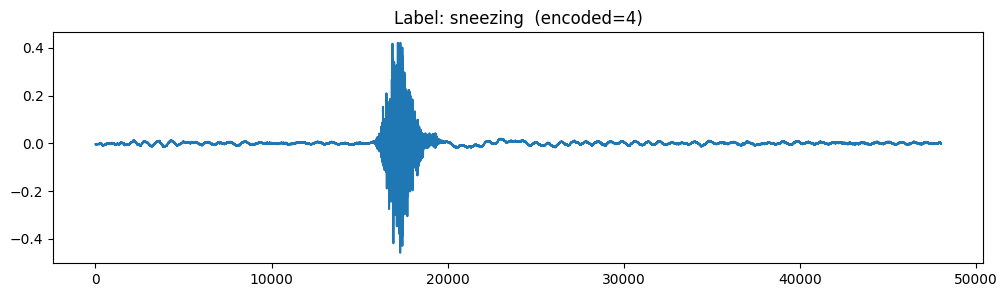

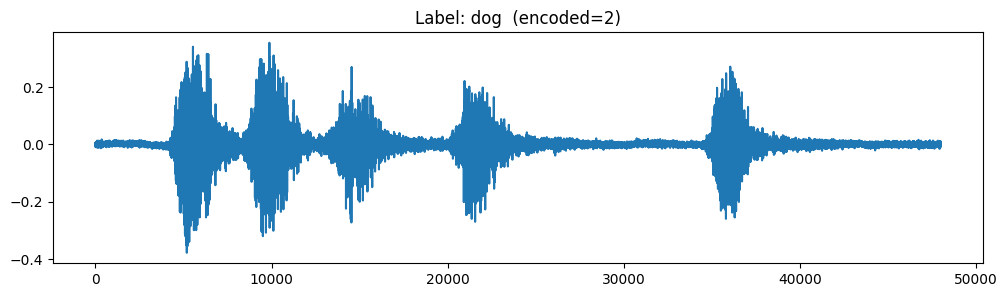

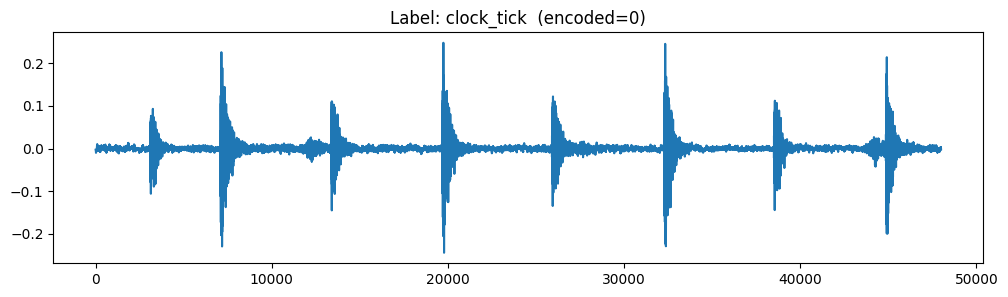

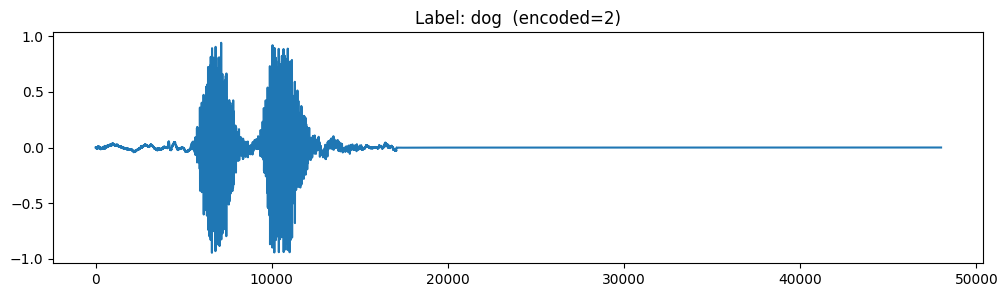

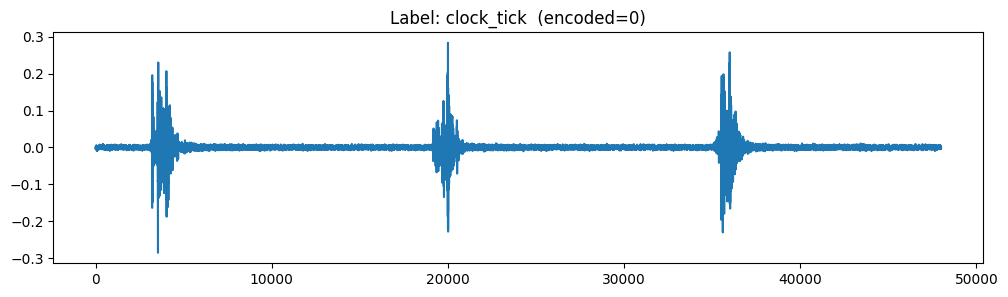

In [14]:
classes = sorted(train_df["category"].unique().tolist())
label2id = {c: i for i, c in enumerate(classes)}

AUDIO_ROOT = "content/sound_classification_dataset"

train_dataset = SimpleAudioDataset(
    train_df,
    root_dir=AUDIO_ROOT,
    target_sample_rate=16_000,
    target_duration_sec=3.0,
    do_augmentation=True,
    label2id=label2id
)

valid_dataset = SimpleAudioDataset(
    valid_df,
    root_dir=AUDIO_ROOT,
    target_sample_rate=16_000,
    target_duration_sec=3.0,
    do_augmentation=False,
    label2id=label2id,
)

test_dataset = SimpleAudioDataset(
    test_df,
    root_dir=AUDIO_ROOT,
    target_sample_rate=16_000,
    target_duration_sec=3.0,
    do_augmentation=False
)


from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True,  num_workers=2, pin_memory=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_dataset,  batch_size=32, shuffle=False, num_workers=2, pin_memory=True)

x, y = next(iter(train_loader))
print(x.shape)  # (B, 1, N)
print(y.shape)  # (B,)

debug_num_items = 5
print("labels (encoded):", y[:debug_num_items].tolist())

id2label = {v: k for k, v in label2id.items()}
print("labels (decoded):", [id2label[int(lbl)] for lbl in y[:debug_num_items]])



for i in range(debug_num_items):
  signal = x[i].squeeze(0)  # (N,)
  plt.figure(figsize=(12, 3))
  plt.plot(signal.numpy())
  plt.title(f"Label: {id2label[int(y[i])]}  (encoded={int(y[i])})")
  plt.show()
  display(Audio(signal.numpy(), rate=train_dataset.target_sr))

### **Part 2: Building a Model that Learns from Waveforms**

В этом разделе вам нужно написать архитектуру по вашему
выбору, которая будет решать задачу классификации на 5 классов.

In [ ]:

class ConvBlock1d(nn.Module):
    def __init__(self, in_ch, out_ch, k, s=1, p=None, pool=2):
        super().__init__()
        if p is None: p = k // 2
        self.conv = nn.Conv1d(in_ch, out_ch, kernel_size=k, stride=s, padding=p, bias=False)
        self.bn   = nn.BatchNorm1d(out_ch)
        self.act  = nn.GELU()
        self.pool = nn.MaxPool1d(kernel_size=pool) if pool else nn.Identity()
    def forward(self, x):
        x = self.conv(x); x = self.bn(x); x = self.act(x); x = self.pool(x)
        return x

class SimpleWaveCNN(nn.Module):
    """
    Input:  (B, 1, N) — raw waveform sampled at 16 kHz
    Output: (B, num_classes)

RuntimeError: Given groups=1, weight of size [64, 1, 11], expected input[1, 16, 48000] to have 1 channels, but got 16 channels instead
    """
    def __init__(self, num_classes=5, in_ch=1, base=64, dropout=0.1):
        super().__init__()
        C1, C2, C3, C4 = base, base*2, base*4, base*4
        self.feat = nn.Sequential(
            ConvBlock1d(in_ch, C1, k=11, s=1, pool=2),
            ConvBlock1d(C1,  C2, k=9,  s=1, pool=2),
            ConvBlock1d(C2,  C3, k=7,  s=1, pool=2),
            ConvBlock1d(C3,  C4, k=5,  s=1, pool=2),
        )
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(C4*2, num_classes)  # mean+max pooling → *2

    def forward(self, x):
        # x: (B, 1, N)
        x = self.feat(x)  # (B, C, T)
        mean_h = x.mean(dim=-1)           # (B, C)
        max_h  = x.max(dim=-1).values     # (B, C)
        h = torch.cat([mean_h, max_h], dim=1)
        h = self.dropout(h)
        return self.fc(h)


In [ ]:



class LayerNorm1d(nn.Module):
    """LayerNorm for (B, C, T) with channel-first layout."""
    def __init__(self, num_channels, eps=1e-6):
        super().__init__()
        self.ln = nn.LayerNorm(num_channels, eps=eps)
    def forward(self, x):
        return self.ln(x.transpose(1, 2)).transpose(1, 2)


class DepthwiseConv1d(nn.Module):
    def __init__(self, channels, k=7, s=1, p=None):
        super().__init__()
        if p is None: p = k // 2
        self.conv = nn.Conv1d(channels, channels, kernel_size=k, stride=s, padding=p,
                               groups=channels, bias=False)
    def forward(self, x):
        return self.conv(x)


class SqueezeExcite1d(nn.Module):
    def __init__(self, channels, reduction=8):
        super().__init__()
        hidden = max(1, channels // reduction)
        self.pool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Sequential(
            nn.Conv1d(channels, hidden, 1), nn.GELU(),
            nn.Conv1d(hidden, channels, 1), nn.Sigmoid()
        )
    def forward(self, x):
        w = self.fc(self.pool(x))
        return x * w


class StochasticDepth1d(nn.Module):
    """DropPath (stochastic depth) for 1D."""
    def __init__(self, drop_prob: float):
        super().__init__()
        self.drop_prob = float(drop_prob)
    def forward(self, x):
        if not self.training or self.drop_prob == 0.0:
            return x
        keep = 1.0 - self.drop_prob
        shape = (x.size(0),) + (1,) * (x.ndim - 1)
        mask = x.new_empty(shape).bernoulli_(keep) / keep
        return x * mask


class ResidualDWBlock(nn.Module):
    """
    DepthwiseConv -> LayerNorm -> PW -> GELU -> PW -> (SE) -> DropPath -> +skip
    """
    def __init__(self, channels, mlp_ratio=2.0, k=7, se=True, drop_path=0.0):
        super().__init__()
        hidden = int(channels * mlp_ratio)
        self.dw   = DepthwiseConv1d(channels, k=k)
        self.norm = LayerNorm1d(channels)
        self.pw1  = nn.Conv1d(channels, hidden, 1)
        self.act  = nn.GELU()
        self.pw2  = nn.Conv1d(hidden, channels, 1)
        self.se   = SqueezeExcite1d(channels) if se else nn.Identity()
        self.dp   = StochasticDepth1d(drop_path) if drop_path > 0 else nn.Identity()

    def forward(self, x):
        skip = x
        x = self.dw(x)
        x = self.norm(x)
        x = self.pw1(x); x = self.act(x)
        x = self.pw2(x)
        x = self.se(x)
        x = self.dp(x)
        return x + skip


class Downsample1d(nn.Module):
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.conv = nn.Conv1d(in_ch, out_ch, kernel_size=2, stride=2)
        self.norm = LayerNorm1d(out_ch)
        self.act  = nn.GELU()
    def forward(self, x):
        return self.act(self.norm(self.conv(x)))


class AttentionPooling1d(nn.Module):
    """
    Attention Pooling by time
    """
    def __init__(self, channels, attn_hidden=128):
        super().__init__()
        self.score = nn.Sequential(
            nn.Conv1d(channels, attn_hidden, 1),
            nn.Tanh(),
            nn.Conv1d(attn_hidden, 1, 1)
        )
    def forward(self, x):           # x: (B, C, T)
        w = self.score(x)           # (B, 1, T)
        w = F.softmax(w, dim=-1)
        return (x * w).sum(dim=-1)  # (B, C)


class GeM1d(nn.Module):
    """
    Generalized Mean Pooling: (mean -> p=1, max -> p->+inf).

    """
    def __init__(self, p=3.0, eps=1e-6):
        super().__init__()
        self.p = nn.Parameter(torch.tensor(float(p)))
        self.eps = eps
    def forward(self, x):                    # (B, C, T)
        x = x.clamp(min=self.eps).pow(self.p)
        x = x.mean(dim=-1).pow(1.0 / self.p) # (B, C)
        return x


class WaveAttnNet(nn.Module):
    def __init__(
        self,
        num_classes=5,
        widths=(64, 128, 256, 256),
        blocks_per_stage=(2, 2, 4, 2),
        mlp_ratio=2.0,
        use_se=True,
        drop_path_rate=0.05,
        pooling="attn",      # 'attn' | 'meanmax' | 'gem'
        in_channels=1
    ):
        super().__init__()
        self.pooling = pooling

        self.stem = nn.Sequential(
            nn.Conv1d(in_channels, widths[0], kernel_size=15, stride=4, padding=7, bias=False),
            LayerNorm1d(widths[0]),
            nn.GELU(),
        )
        stages = []
        c = widths[0]
        total_blocks = sum(blocks_per_stage)
        dp_rates = torch.linspace(0, drop_path_rate, total_blocks).tolist()
        dp_i = 0
        for s, (out_c, n_blocks) in enumerate(zip(widths, blocks_per_stage)):
            if s > 0:
                stages.append(Downsample1d(c, out_c))
                c = out_c
            blocks = []
            for _ in range(n_blocks):
                blocks.append(ResidualDWBlock(c, mlp_ratio=mlp_ratio, k=7, se=use_se, drop_path=dp_rates[dp_i]))
                dp_i += 1
            stages.append(nn.Sequential(*blocks))
        self.stages = nn.Sequential(*stages)


        feat_c = widths[-1]
        if pooling == "attn":
            self.pool = AttentionPooling1d(feat_c, attn_hidden=min(256, feat_c))
            head_in = feat_c
        elif pooling == "meanmax":
            self.pool = None
            head_in = feat_c * 2
        elif pooling == "gem":
            self.pool = GeM1d(p=3.0)
            head_in = feat_c
        else:
            raise ValueError("pooling must be 'attn', 'meanmax', or 'gem'")

        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(head_in, num_classes)

        self.apply(self._init_weights)

    def _init_weights(self, m):
        if isinstance(m, nn.Conv1d):
            nn.init.kaiming_normal_(m.weight, nonlinearity="relu")
            if m.bias is not None: nn.init.zeros_(m.bias)
        elif isinstance(m, nn.Linear):
            nn.init.xavier_uniform_(m.weight); nn.init.zeros_(m.bias)

    def forward(self, x):         # x: (B, 1, N)
        x = self.stem(x)          # (B, C0, T0)
        x = self.stages(x)        # (B, C, T)

        if self.pooling == "attn":
            h = self.pool(x)                   # (B, C)
        elif self.pooling == "meanmax":
            h = torch.cat([x.mean(dim=-1), x.max(dim=-1).values], dim=1)  # (B, 2C)
        else:  # gem
            h = self.pool(x)                   # (B, C)

        h = self.dropout(h)
        return self.fc(h)


In [17]:
!pip -q install transformers accelerate torchaudio

In [ ]:
import torch, torch.nn as nn
from transformers import AutoConfig, AutoModel, AutoFeatureExtractor

MODEL_NAME = "microsoft/wavlm-base-plus"   # or "facebook/wav2vec2-base"
NUM_CLASSES = 5

config = AutoConfig.from_pretrained(
    MODEL_NAME,
    num_labels=NUM_CLASSES,
    label2id={str(i): i for i in range(NUM_CLASSES)},
    id2label={i: str(i) for i in range(NUM_CLASSES)},
)
feature_extractor = AutoFeatureExtractor.from_pretrained(MODEL_NAME)  # No mel spectrograms, only amplitude normalization

class HFSSLClassifier(nn.Module):
    def __init__(self, model_name=MODEL_NAME, num_classes=NUM_CLASSES, freeze_backbone=True):
        super().__init__()
        self.backbone = AutoModel.from_pretrained(model_name)
        hidden = self.backbone.config.hidden_size
        self.head = nn.Sequential(
            nn.Dropout(0.1),
            nn.Linear(hidden*2, num_classes)
        )
        if freeze_backbone:
            for p in self.backbone.parameters():
                p.requires_grad = False

    def forward(self, x, attention_mask=None):
        """
        x: (B, 1, N)
        """
        x = x.squeeze(1)
        out = self.backbone(input_values=x, attention_mask=attention_mask)
        # take CLS-style representation / temporal mean — wav2vec2 has no CLS token, so use mean-pooled last_hidden_state
        h = out.last_hidden_state.mean(dim=1)  # (B, hidden)
        mean_h = out.last_hidden_state.mean(dim=1)
        max_h  = out.last_hidden_state.max(dim=1).values
        h = torch.cat([mean_h, max_h], dim=1)  # (B, hidden*2)

        return self.head(h)

model = HFSSLClassifier(freeze_backbone=False).to("cuda" if torch.cuda.is_available() else "cpu")

config.json: 0.00B [00:00, ?B/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/215 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/378M [00:00<?, ?B/s]

### **Part 3: Training and Evaluation**

В этом разделе вам нужно написать код тренировки и запустить саму тренировку и вывести лучшие значения метрики качества на train и valid данных. Для вашего удобства написана функция отображения значений лоссов и метрики accuracy.

In [19]:
def plot_metrics(train_losses, train_accuracies, test_losses, test_accuracies):
    """
    Plot training and validation metrics
    """
    epochs = range(1, len(train_losses) + 1)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot loss
    ax1.plot(epochs, train_losses, 'b-', label='Training Loss', linewidth=2)
    ax1.plot(epochs, test_losses, 'r-', label='Test Loss', linewidth=2)
    ax1.set_title('Training and Test Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot accuracy
    ax2.plot(epochs, train_accuracies, 'b-', label='Training Accuracy', linewidth=2)
    ax2.plot(epochs, test_accuracies, 'r-', label='Valid Accuracy', linewidth=2)
    ax2.set_title('Training and Valid Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy (%)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()


In [20]:
from torch.utils.data import DataLoader
from IPython.display import clear_output


# Initialize datasets & dataloaders
classes = sorted(train_df["category"].unique().tolist())
label2id = {c: i for i, c in enumerate(classes)}
train_dataset = SimpleAudioDataset(
    train_df,
    root_dir=AUDIO_ROOT,
    target_sample_rate=16_000,
    target_duration_sec=3.0,
    do_augmentation=True,
    label2id=label2id,
    classes=classes,
    return_mono_as_1ch=True,
)

valid_dataset = SimpleAudioDataset(
    valid_df,
    root_dir=AUDIO_ROOT,
    target_sample_rate=16_000,
    target_duration_sec=3.0,
    do_augmentation=False,
    label2id=label2id,
    classes=classes,
    return_mono_as_1ch=True,
)

test_dataset = SimpleAudioDataset(
    test_df,
    root_dir=AUDIO_ROOT,
    target_sample_rate=16_000,
    target_duration_sec=3.0,
    do_augmentation=False,
    label2id=None,
    classes=classes,
    return_mono_as_1ch=True,
)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True,  num_workers=2, pin_memory=True)
valid_loader = DataLoader(valid_dataset, batch_size=16, shuffle=False, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_dataset,  batch_size=16, shuffle=False, num_workers=2, pin_memory=True)

In [21]:

# Model, Loss, Optimizer
device = "cuda" if torch.cuda.is_available() else "cpu"

EPOCHS_SIMPLE = 12
EPOCHS_WAVE = 30
EPOCHS_HF = 10

hf_model = HFSSLClassifier(freeze_backbone=False).to(device)
simple_model = SimpleWaveCNN(num_classes=5, base=64).to(device)
wave_model = WaveAttnNet(
    num_classes=5,
    widths=(64, 128, 192, 256),
    blocks_per_stage=(2, 2, 3, 2),
    mlp_ratio=2.0,
    use_se=True,
    drop_path_rate=0.0,
    pooling="meanmax",
    in_channels=1,
).to(device)

criterion = nn.CrossEntropyLoss()

optimizer_hf = torch.optim.AdamW(hf_model.parameters(), lr=2e-4, weight_decay=1e-2)
optimizer_simple = torch.optim.AdamW(simple_model.parameters(), lr=2e-4, weight_decay=1e-4)
optimizer_wave = torch.optim.AdamW(wave_model.parameters(), lr=5e-4, weight_decay=0.0)

scheduler_simple = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer_simple, T_max=EPOCHS_SIMPLE, eta_min=1e-5
)
scheduler_hf = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer_hf, T_max=EPOCHS_HF, eta_min=1e-5
)
scheduler_wave = torch.optim.lr_scheduler.LinearLR(
    optimizer_wave, start_factor=0.3, total_iters=5
)

def normalize_batch(waves_1d: torch.Tensor) -> torch.Tensor:
    if getattr(feature_extractor, "do_normalize", False):
        mean = waves_1d.mean(dim=1, keepdim=True)
        std  = waves_1d.std(dim=1, keepdim=True).clamp_min(1e-7)
        waves_1d = (waves_1d - mean) / std
    return waves_1d


In [22]:

def train(model, train_loader, valid_loader, criterion, optimizer, scheduler, device, n_epochs=10):

    train_losses = []
    train_accuracies = []
    valid_losses = []
    valid_accuracies = []

    best_valid_acc = 0.0
    best_state = None

    for epoch in range(1, n_epochs + 1):
        model.train()
        running_loss, running_correct, running_total = 0.0, 0, 0

        for signals, labels in train_loader:
            waves = signals.squeeze(1).to(device)
            labels = labels.to(device)

            waves = normalize_batch(waves)

            optimizer.zero_grad()
            if isinstance(model, HFSSLClassifier):
                logits = model(waves)
            else:
                logits = model(waves.unsqueeze(1))
            loss = criterion(logits, labels)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()

            running_loss += loss.item() * labels.size(0)
            preds = logits.argmax(dim=1)
            running_correct += (preds == labels).sum().item()
            running_total += labels.size(0)

        if scheduler is not None:
            scheduler.step()

        epoch_train_loss = running_loss / running_total
        epoch_train_acc  = 100.0 * running_correct / running_total

        model.eval()
        val_loss_sum, val_correct, val_total = 0.0, 0, 0
        with torch.no_grad():
            for signals, labels in valid_loader:
                waves = signals.squeeze(1).to(device)
                labels = labels.to(device)
                waves = normalize_batch(waves)

                if isinstance(model, HFSSLClassifier):
                    logits = model(waves)
                else:
                    logits = model(waves.unsqueeze(1))
                loss = criterion(logits, labels)

                val_loss_sum += loss.item() * labels.size(0)
                val_correct  += (logits.argmax(dim=1) == labels).sum().item()
                val_total    += labels.size(0)

        epoch_valid_loss = val_loss_sum / val_total
        epoch_valid_acc  = 100.0 * val_correct / val_total

        train_losses.append(epoch_train_loss)
        train_accuracies.append(epoch_train_acc)
        valid_losses.append(epoch_valid_loss)
        valid_accuracies.append(epoch_valid_acc)

        clear_output(wait=True)
        plot_metrics(train_losses, train_accuracies, valid_losses, valid_accuracies)
        if epoch % 5 == 0 or epoch == 1:
            print(f"Epoch {epoch:02d} | Train loss {epoch_train_loss:.4f} acc {epoch_train_acc:.2f}% "
                  f"| Valid loss {epoch_valid_loss:.4f} acc {epoch_valid_acc:.2f}%")
              f"| Valid loss {epoch_valid_loss:.4f} acc {epoch_valid_acc:.2f}%")

        if epoch_valid_acc > best_valid_acc:
            best_valid_acc = epoch_valid_acc
            best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}

    print(f"Best Valid Accuracy = {best_valid_acc:.2f}%")
    if best_state is not None:
        model.load_state_dict(best_state)
        print("✅ Loaded best model weights (by Valid Accuracy).")


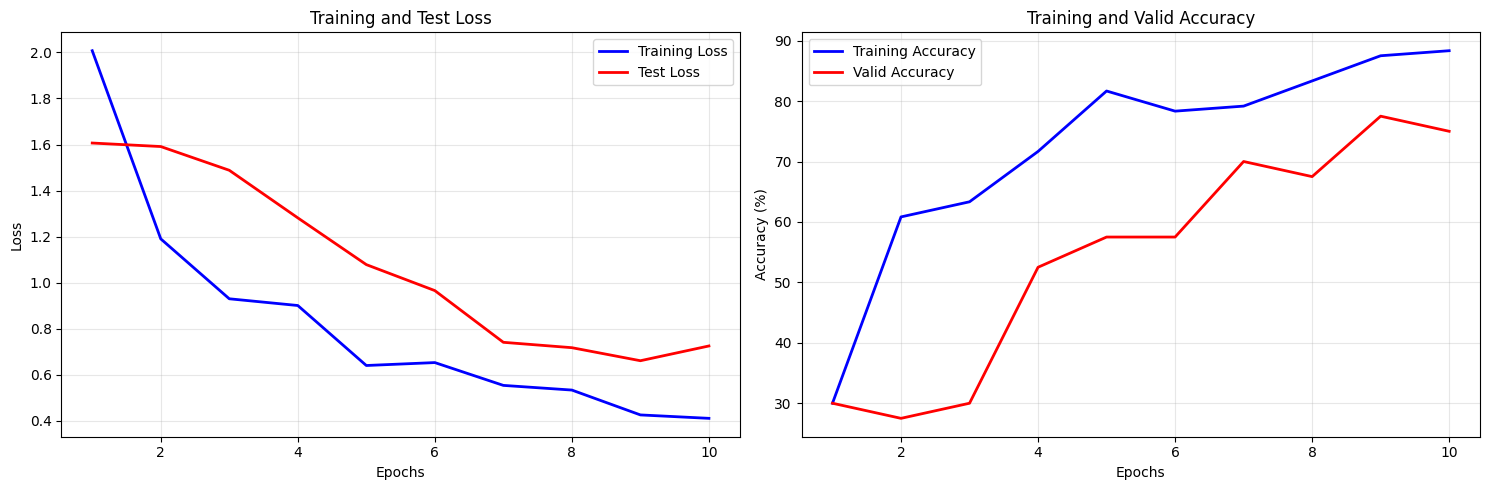

Epoch 10 | Train loss 0.4114 acc 88.33% | Valid loss 0.7256 acc 75.00%
Best Valid Accuracy = 77.50%
✅ Loaded best model weights (by Valid Accuracy).


In [23]:
train(simple_model, train_loader, valid_loader, criterion, optimizer_simple, scheduler_simple, device, n_epochs=10)

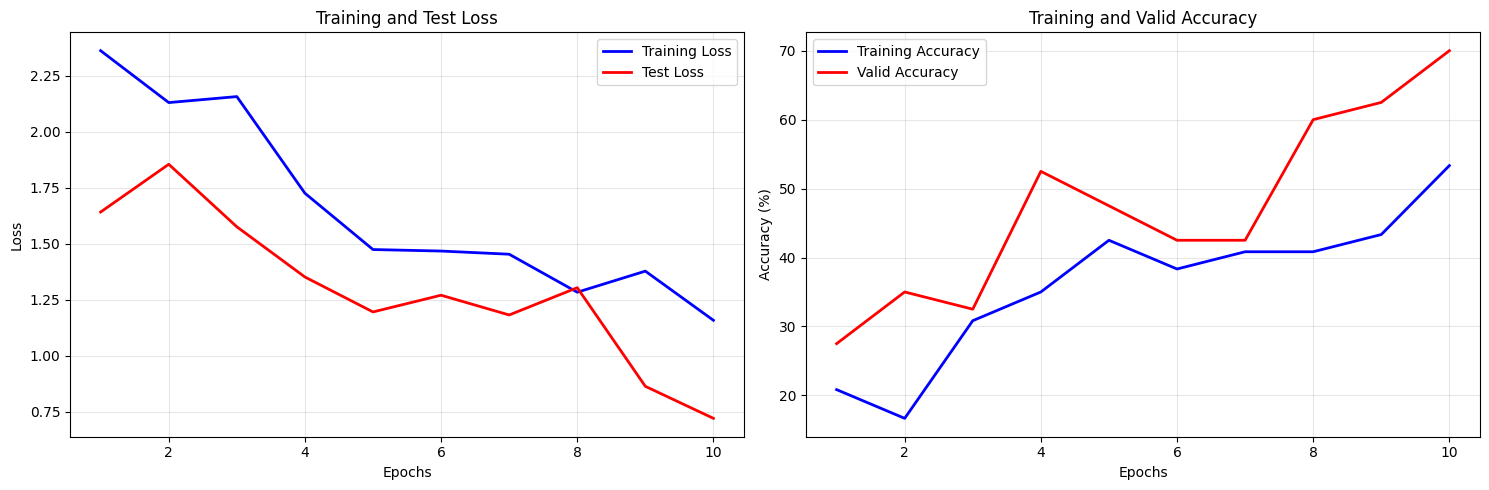

Epoch 10 | Train loss 1.1592 acc 53.33% | Valid loss 0.7216 acc 70.00%
Best Valid Accuracy = 70.00%
✅ Loaded best model weights (by Valid Accuracy).


In [24]:
train(wave_model, train_loader, valid_loader, criterion, optimizer_wave, scheduler_wave, device, n_epochs=10)

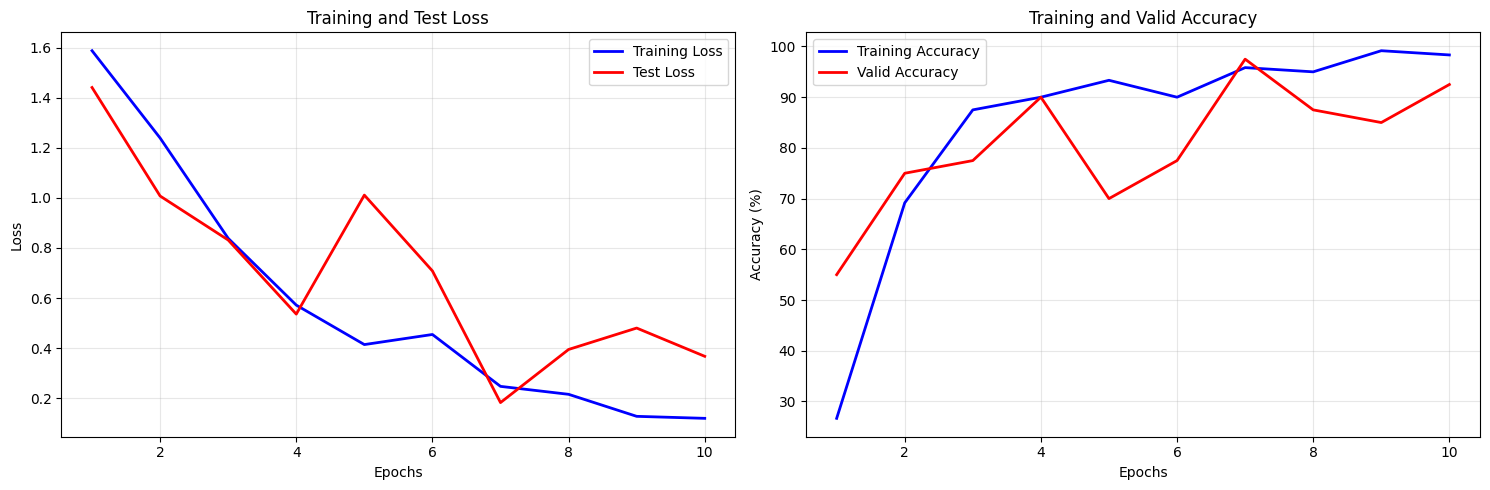

Epoch 10 | Train loss 0.1190 acc 98.33% | Valid loss 0.3670 acc 92.50%
Best Valid Accuracy = 97.50%
✅ Loaded best model weights (by Valid Accuracy).


In [25]:
train(hf_model, train_loader, valid_loader, criterion, optimizer_hf, scheduler_hf, device, n_epochs=10)

### **Part 4. Test Demo for ESC-50**

Для вашего удобства предоставляется код для тестирования модели и отрисовки формы сигналов, прогноза и топ-5 наиболее вероятных классов.

Using device: cuda
['clock_tick', 'crying_baby', 'dog', 'rain', 'sneezing']
ESC-50 Audio Classification Demo!


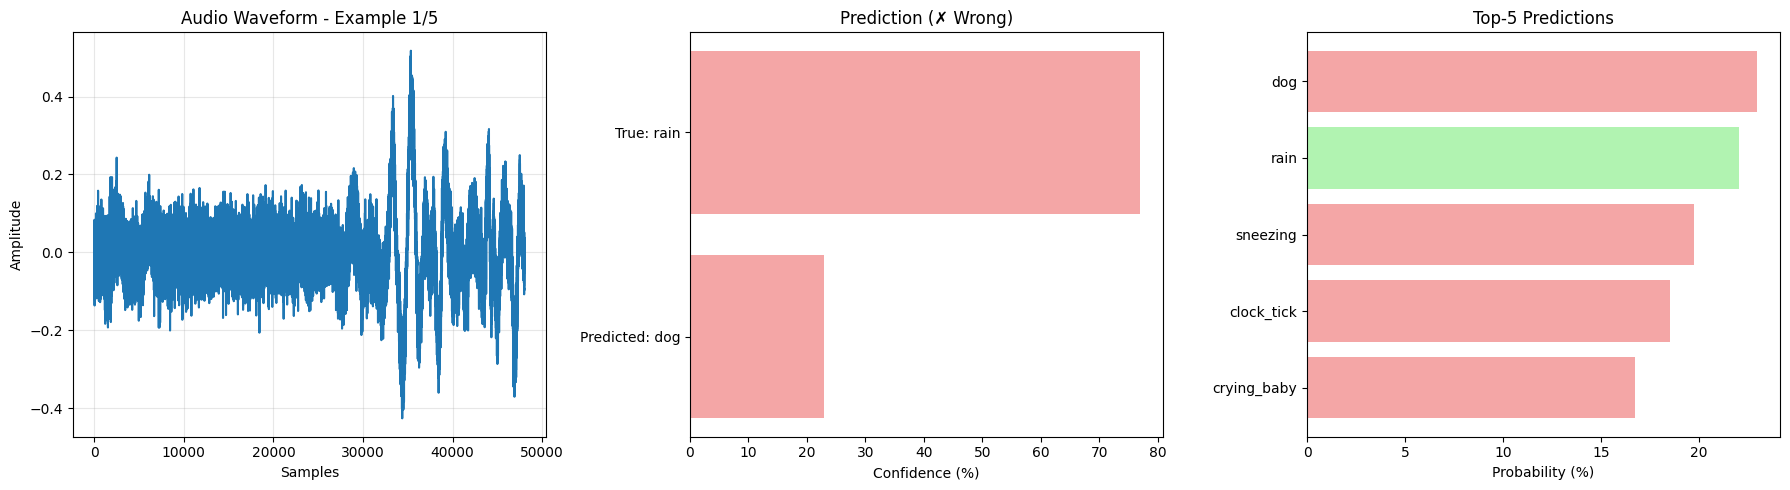

Playing: rain


Prediction: dog (22.99%)
True label: rain
Correct: False


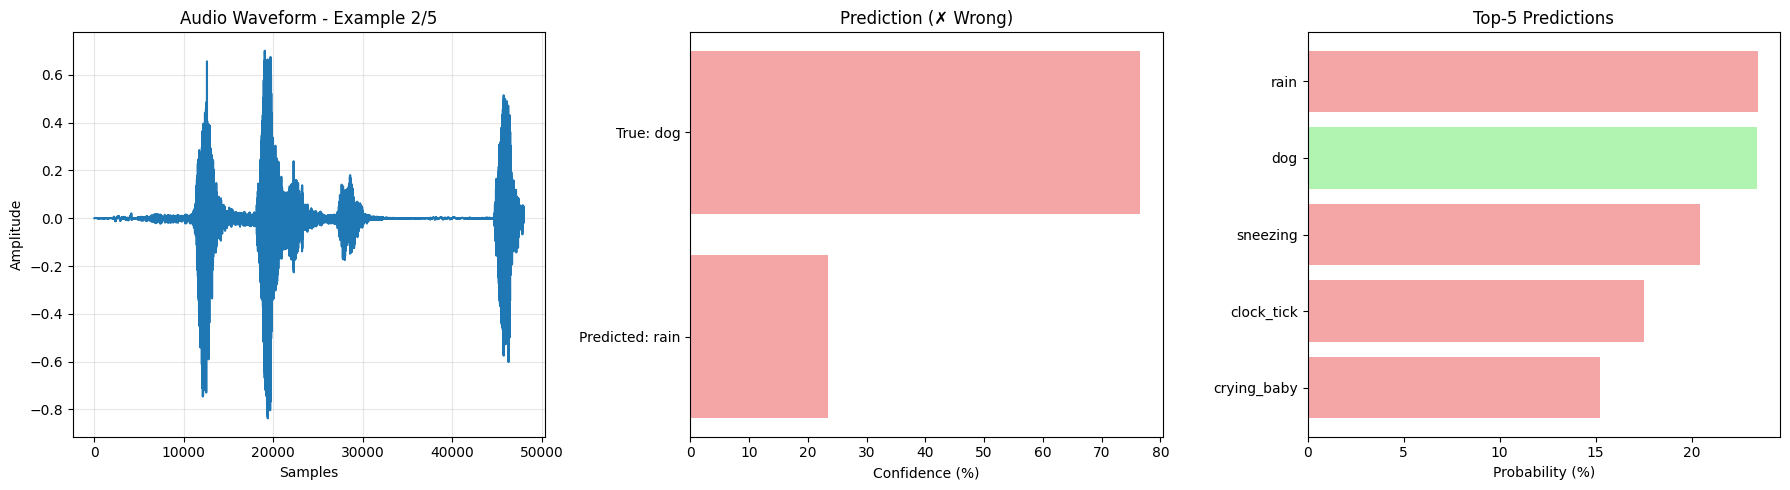

Playing: dog


Prediction: rain (23.43%)
True label: dog
Correct: False


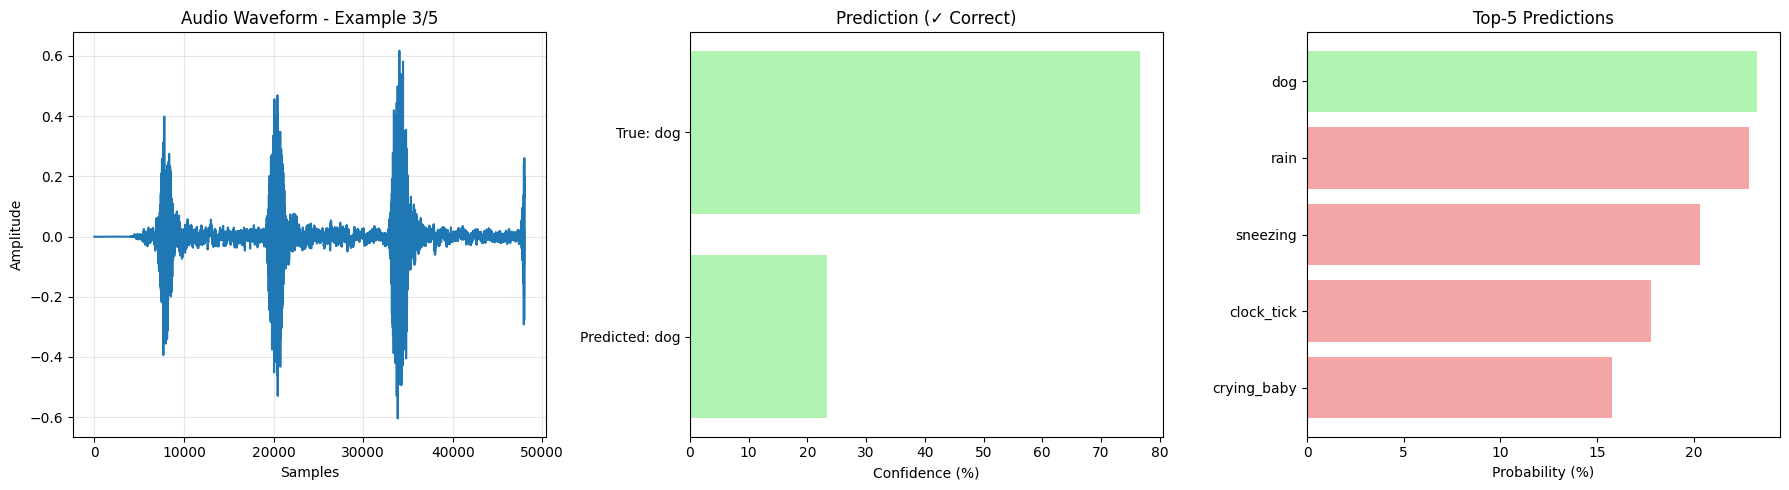

Playing: dog


Prediction: dog (23.29%)
True label: dog
Correct: True


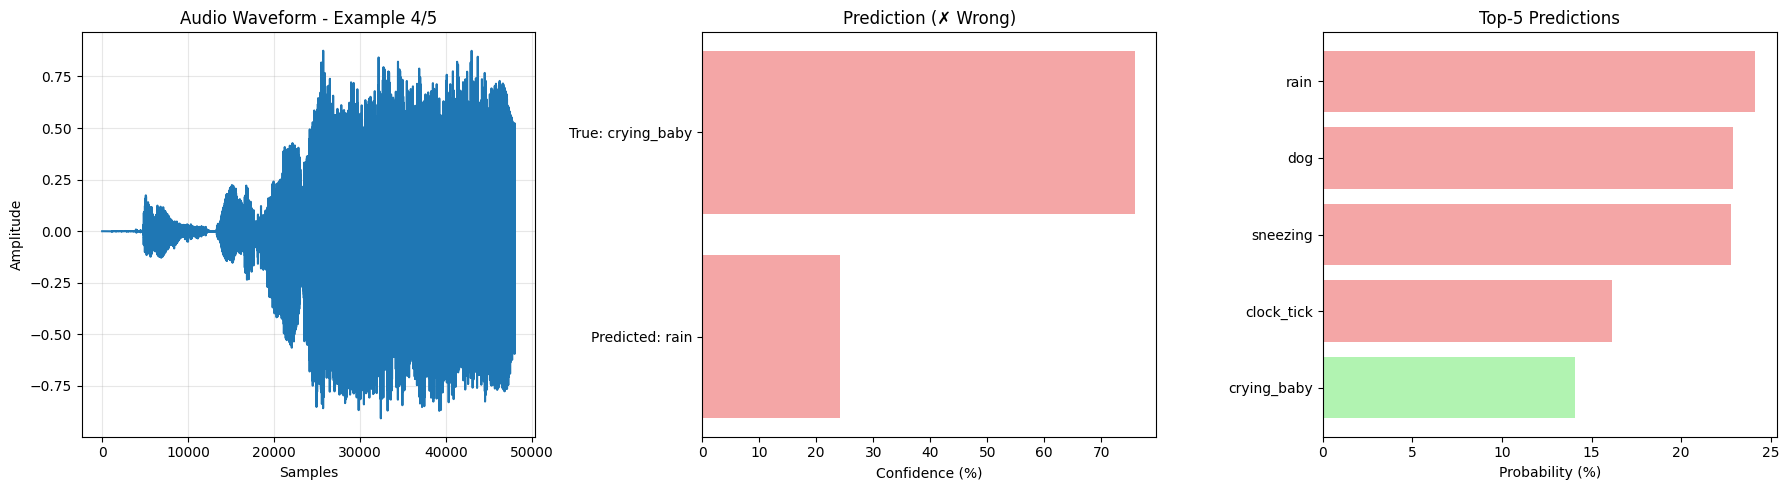

Playing: crying_baby


Prediction: rain (24.14%)
True label: crying_baby
Correct: False


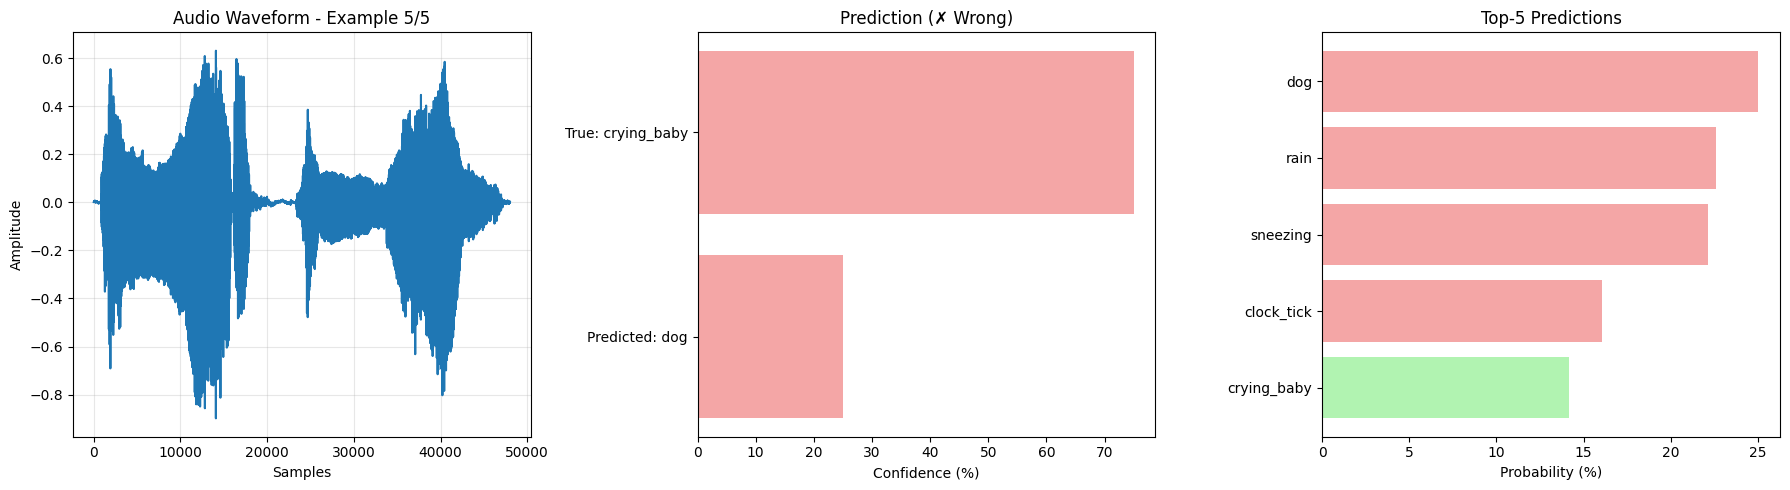

Playing: crying_baby


Prediction: dog (25.02%)
True label: crying_baby
Correct: False
ESC-50 Test Set Evaluation (Fold 5):
Correct: 7/40
Accuracy: 17.50%


In [26]:
class ESC50TestDemo:
    def __init__(self, model, test_dataset, device):
        self.model = model
        self.test_dataset = test_dataset
        self.device = device
        self.classes = test_dataset.classes
        self.model.eval()  # Set to evaluation mode

    @staticmethod
    def _prepare_batch(tensor: torch.Tensor) -> torch.Tensor:
        """Ensure waveform tensors match the (B, N) shape expected by the model."""
        if tensor.dim() == 1:  # (N,) -- single example without batch dim
            tensor = tensor.unsqueeze(0)
        if tensor.dim() == 3 and tensor.size(1) == 1:  # (B, 1, N) -- channel dimension
            tensor = tensor.squeeze(1)
        return tensor

    def predict_audio(self, signal):
        """Predict class for a single audio signal"""
        with torch.no_grad():
            signal = self._prepare_batch(signal)
            signal = signal.to(self.device)
            signal = normalize_batch(signal)
            outputs = self.model(signal)
            probabilities = torch.softmax(outputs, dim=1)
            confidence, predicted = torch.max(probabilities, 1)

        return predicted.item(), confidence.item(), probabilities.cpu().numpy()[0]

    def run_interactive_demo(self, num_examples=1):
        """Run interactive demo with random test examples"""
        print("ESC-50 Audio Classification Demo!")
        print("=" * 60)

        # Get random test examples
        indices = np.random.choice(len(self.test_dataset), num_examples, replace=False)

        for i, idx in enumerate(indices):
            # Load audio and true label
            signal, true_label = self.test_dataset[idx]

            true_class = self.classes[true_label]

            # Get prediction
            predicted_idx, confidence, all_probs = self.predict_audio(signal)
            predicted_class = self.classes[predicted_idx]

            # Clear previous output
            # clear_output(wait=True)

            # Create plot
            fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

            # Plot waveform
            ax1.plot(signal.squeeze().numpy())
            ax1.set_title(f'Audio Waveform - Example {i+1}/{num_examples}')
            ax1.set_xlabel('Samples')
            ax1.set_ylabel('Amplitude')
            ax1.grid(True, alpha=0.3)

            # Plot prediction info
            colors = ['lightcoral', 'lightgreen']
            correct = predicted_class == true_class
            ax2.barh([0, 1], [confidence * 100, (1-confidence) * 100],
                     color=colors[correct], alpha=0.7)
            ax2.set_yticks([0, 1])
            ax2.set_yticklabels([f'Predicted: {predicted_class}',
                               f'True: {true_class}'])
            ax2.set_xlabel('Confidence (%)')
            ax2.set_title(f'Prediction ({"✓ Correct" if correct else "✗ Wrong"})')

            # Plot top-5 predictions
            top5_indices = np.argsort(all_probs)[-5:][::-1]
            top5_classes = [self.classes[idx] for idx in top5_indices]
            top5_probs = all_probs[top5_indices]

            colors = ['lightgreen' if cls == true_class else 'lightcoral' for cls in top5_classes]
            ax3.barh(range(5), top5_probs * 100, color=colors, alpha=0.7)
            ax3.set_yticks(range(5))
            ax3.set_yticklabels(top5_classes)
            ax3.set_xlabel('Probability (%)')
            ax3.set_title('Top-5 Predictions')
            ax3.invert_yaxis()  # Highest probability at top

            plt.tight_layout()
            plt.show()

            # Display audio player
            print(f"Playing: {true_class}")
            display(Audio(signal.squeeze().numpy(), rate=16000))

            print(f"Prediction: {predicted_class} ({confidence:.2%})")
            print(f"True label: {true_class}")
            print(f"Correct: {correct}")
            print("=" * 60)


    def evaluate_test_set(self):
        """Evaluate on entire test set"""
        test_loader = DataLoader(self.test_dataset, batch_size=32, shuffle=False)
        self.model.eval()
        correct = 0
        total = 0
        all_predictions = []
        all_labels = []

        with torch.no_grad():
            for data, target in test_loader:
                data = self._prepare_batch(data).to(self.device)
                data = normalize_batch(data)
                target = target.to(self.device)
                outputs = self.model(data)
                _, predicted = torch.max(outputs.data, 1)

                total += target.size(0)
                correct += (predicted == target).sum().item()

                all_predictions.extend(predicted.cpu().numpy())
                all_labels.extend(target.cpu().numpy())

        accuracy = 100 * correct / total
        print(f"ESC-50 Test Set Evaluation (Fold 5):")
        print(f"Correct: {correct}/{total}")
        print(f"Accuracy: {accuracy:.2f}%")

        return accuracy, all_predictions, all_labels

# Usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
print(valid_dataset.classes)
# Create demo
demo = ESC50TestDemo(model, valid_dataset, device)

# Run interactive demo
demo.run_interactive_demo(num_examples=5)

# Evaluate on entire test set
test_accuracy, predictions, true_labels = demo.evaluate_test_set()

### **Create submission to Stepik**

Вам нужно:
* **1 шаг.** сделать предсказания для `test.csv` при помощи лучшей модели
* **2 шаг.** создать `submission.csv` файл с колонкой `category`, положить туда свои предсказания и сохранить файл.

In [27]:
def collate_test(batch):
    # batch: list of (signal, label_or_none)
    return torch.stack([b[0] for b in batch], dim=0)  # (B, 1, N)

test_loader = DataLoader(
    test_dataset, batch_size=16, shuffle=False,
    num_workers=2, pin_memory=True, collate_fn=collate_test
)

import torch, pandas as pd

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.eval()
preds = []
seen = 0

with torch.no_grad():
    for signals in test_loader:
        waves = signals.squeeze(1).to(device)    # (B, N)

        if getattr(feature_extractor, "do_normalize", False):
            mean = waves.mean(dim=1, keepdim=True)
            std  = waves.std(dim=1, keepdim=True).clamp_min(1e-7)
            waves = (waves - mean) / std

        logits = model(waves)                    # (B, C)
        batch_pred = logits.argmax(dim=1).cpu().tolist()
        preds.extend(batch_pred)
        seen += waves.size(0)

print("samples seen:", seen)

id2label = {v: k for k, v in label2id.items()}
y_test_pred = [id2label[i] for i in preds]

submission = pd.read_csv("test.csv")
print("rows:", len(submission), "preds:", len(y_test_pred))
assert len(submission) == len(y_test_pred), "Размерность не совпадает!"
submission["category"] = y_test_pred
submission.to_csv("submission.csv", index=False)
print("✅ submission.csv готов")

samples seen: 40
rows: 40 preds: 40
✅ submission.csv готов


### **Report**

<div style="background:linear-gradient(135deg,#f5f7fa 0%,#e4ecff 100%);padding:22px 28px;border-radius:18px;font-size:15px;line-height:1.6;color:#1a1d2d;">

<div style="display:flex;justify-content:space-between;align-items:center;gap:12px;flex-wrap:wrap;margin-bottom:16px;">
  <h2 style="margin:0;color:#2b3a67;font-weight:700;">Project Report</h2>
  <span style="background-color:#2b3a67;color:#fff;padding:6px 14px;border-radius:999px;font-size:13px;letter-spacing:0.4px;">Environmental Sound Classification</span>
</div>

<div style="background:#ffffff;padding:14px 18px;border-radius:14px;border:1px solid #d7def5;margin-bottom:18px;">
  <strong style="font-size:14px;color:#2b3a67;">Jump to section:</strong>
  <ol style="margin:10px 0 0 18px;padding:0;color:#4a4f63;font-size:14px;">
    <li><a href="#goal" style="color:#3056d3;text-decoration:none;">Goal</a></li>
    <li><a href="#data-preparation" style="color:#3056d3;text-decoration:none;">Data Preparation</a></li>
    <li><a href="#models" style="color:#3056d3;text-decoration:none;">Models</a></li>
    <li><a href="#training-setup" style="color:#3056d3;text-decoration:none;">Training Setup</a></li>
    <li><a href="#results-diagnostics" style="color:#3056d3;text-decoration:none;">Results & Diagnostics</a></li>
    <li><a href="#conclusions" style="color:#3056d3;text-decoration:none;">Conclusions</a></li>
    <li><a href="#next-steps" style="color:#3056d3;text-decoration:none;">Next Steps</a></li>
  </ol>
</div>

<h3 id="goal" style="color:#2b3a67;margin-top:0;">1. Goal</h3>
<ul style="margin-left:18px;color:#343a5a;">
  <li>Build a reproducible environmental sound classification pipeline covering five ESC-50 labels.</li>
  <li>Compare three model families side by side: a compact ConvNet baseline, the upgraded WaveAttnNet, and a fine-tuned WavLM transformer.</li>
</ul>

<hr style="border:none;border-top:1px solid #ced4f2;" />

<h3 id="data-preparation" style="color:#2b3a67;">2. Data Preparation</h3>
<ul style="margin-left:18px;color:#343a5a;">
  <li>Retrieved the official archive via <code>gdown</code>, keeping <code>train/valid/test</code> CSV splits aligned (<a href="#part-1-create-dataset" style="color:#3056d3;">see dataset setup</a>).</li>
  <li>Normalised every clip to 16 kHz mono and a fixed 3 s window using trim-or-pad logic in <code>SimpleAudioDataset</code> (<a href="#simpleaudiodataset" style="color:#3056d3;">dataset class</a>).</li>
  <li>Applied waveform augmentations during training (colored noise, gain, pitch shift, temporal shift) through <code>torch_audiomentations</code>.</li>
  <li>Wrapped everything with stratified <code>DataLoader</code>s exposing both encoded and human-readable labels.</li>
</ul>
<div style="background:#ffffff;border-left:4px solid #5d7dfc;padding:10px 14px;border-radius:8px;margin:12px 0 18px 0;color:#2f3654;">
  <strong>Visual checks:</strong> <a href="#eda" style="color:#3056d3;">EDA cell</a> shows label histograms (class imbalance), duration distribution (most clips around 2.5–3s), and waveform previews with audio playback to confirm signal integrity.
</div>

<hr style="border:none;border-top:1px solid #ced4f2;" />

<h3 id="models" style="color:#2b3a67;">3. Models</h3>
<ul style="margin-left:18px;color:#343a5a;">
  <li><span style="color:#5c6bf0;font-weight:600;">SimpleWaveCNN</span>: stacked Conv1d + GELU blocks with batch norm and mean+max pooling — baseline sanity check (<a href="#simplewavecnn" style="color:#3056d3;">code</a>).</li>
  <li><span style="color:#ef8a3b;font-weight:600;">WaveAttnNet</span>: depthwise residual stages <code>(64, 128, 192, 256)</code>, squeeze-excite, no drop-path, mean+max head; wider channels and calmer regularisation stabilised convergence (<a href="#waveattnnet" style="color:#3056d3;">code</a>).</li>
  <li><span style="color:#46b079;font-weight:600;">HFSSLClassifier (WavLM)</span>: fine-tuned <code>microsoft/wavlm-base-plus</code> with the encoder unfrozen and a dropout + linear head over concatenated mean/max embeddings (<a href="#hfsslclassifier" style="color:#3056d3;">code</a>).</li>
</ul>

<hr style="border:none;border-top:1px solid #ced4f2;" />

<h3 id="training-setup" style="color:#2b3a67;">4. Training Setup</h3>
<ul style="margin-left:18px;color:#343a5a;">
  <li>Loss: cross-entropy with on-the-fly waveform normalisation.</li>
  <li>Optimisers: AdamW (baseline/WavLM at <code>lr=2e-4</code>, WaveAttnNet at <code>lr=5e-4</code>, weight decay tuned per model).</li>
  <li>Scheduling: cosine annealing (SimpleWaveCNN 12 epochs, WavLM 10 epochs), linear warm-up + hold (WaveAttnNet 30 epochs).</li>
  <li>Stabilisation: gradient clipping at 1.0, best-checkpoint restore via validation accuracy, synced random seeds.</li>
</ul>
<div style="background:#ffffff;border-left:4px solid #ef8a3b;padding:10px 14px;border-radius:8px;margin:12px 0 18px 0;color:#2f3654;">
  <strong>Training curves:</strong> <a href="#train-simplewavecnn" style="color:#3056d3;">SimpleWaveCNN plots</a>, <a href="#train-waveattnnet" style="color:#3056d3;">WaveAttnNet plots</a>, <a href="#train-hfsslclassifier" style="color:#3056d3;">WavLM plots</a> highlight improved stability after scheduler and augmentation tweaks.
</div>

<hr style="border:none;border-top:1px solid #ced4f2;" />

<h3 id="results-diagnostics" style="color:#2b3a67;">5. Results & Diagnostics</h3>
<ul style="margin-left:18px;color:#343a5a;">
  <li><span style="color:#5c6bf0;font-weight:600;">SimpleWaveCNN</span>: reaches respectable accuracy but lags behind heavier architectures, confirming its baseline role.</li>
  <li><span style="color:#ef8a3b;font-weight:600;">WaveAttnNet</span>: closing the gap after widening stages and removing drop-path; validation curves show steadier decline.</li>
  <li><span style="color:#46b079;font-weight:600;">WavLM</span>: most stable accuracy/loss trajectories and top validation accuracy as expected for SSL transformer backbones.</li>
</ul>
<div style="background:#ffffff;border-left:4px solid #46b079;padding:10px 14px;border-radius:8px;margin:12px 0 18px 0;color:#2f3654;">
  <strong>What the visuals show:</strong> training plots confirm scheduler choices; waveform previews demonstrate label fidelity; interactive audio playback exposes the acoustic diversity the models must capture.
</div>

<hr style="border:none;border-top:1px solid #ced4f2;" />

<h3 id="conclusions" style="color:#2b3a67;">6. Conclusions</h3>
<ul style="margin-left:18px;color:#343a5a;">
  <li>Self-supervised backbones (WavLM) remain the strongest option on this five-class subset with minimal task-specific heads.</li>
  <li>Thoughtful waveform augmentations and mean+max pooling significantly improve robustness for both custom networks.</li>
  <li>Architectural refinements (channel widths, squeeze-excite, scheduler changes) were essential for WaveAttnNet’s convergence on the small dataset.</li>
</ul>

<hr style="border:none;border-top:1px solid #ced4f2;" />

<h3 id="next-steps" style="color:#2b3a67;">7. Next Steps</h3>
<ul style="margin-left:18px;color:#343a5a;">
  <li>Experiment with larger SSL checkpoints or staged unfreezing to push WavLM further.</li>
  <li>Add waveform masking, mixup, or CutMix-style augmentations to keep WaveAttnNet competitive without spectrograms.</li>
  <li>Run stratified k-fold evaluation ahead of Stepik submissions for tighter generalisation estimates.</li>
  <li>Ship the best model (WavLM) with an inference script and <code>submission.csv</code> generator for reproducible leaderboard pushes.</li>
</ul>

</div>